<a href="https://colab.research.google.com/github/samanthajmichael/machine_learning/blob/main/notebooks/Regression_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSBA 6165: Applied Machine Learning**

Professor: Rick Chakra

TA: Geethika Balasubramanian

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

plt.rcParams['figure.figsize'] = [8, 7]
plt.rcParams['figure.dpi'] = 100

For the purpose of our lab, we are creating our own dataset. We are utilizing sine function to create the data. We also add some the random noise here.

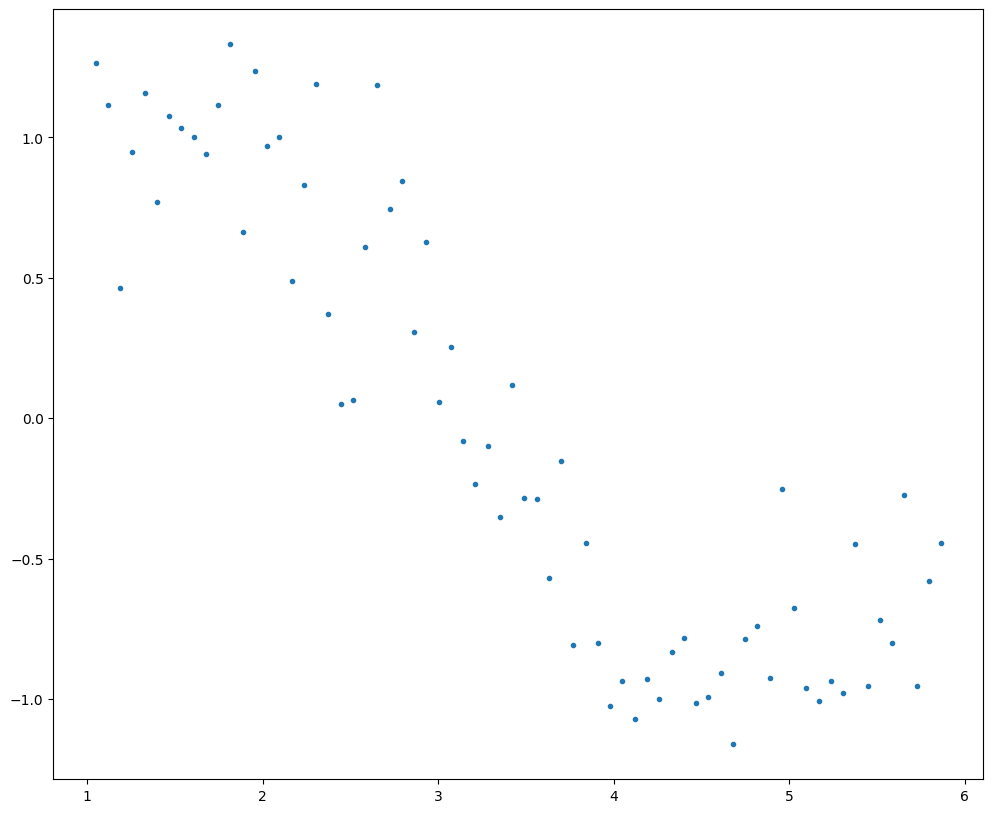

In [2]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,340,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.30,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')
plt.show()

In [3]:
y=data.y


In [4]:
X=data.drop('y',axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [6]:
model = LinearRegression().fit(X_train, y_train)

b_0    = model.intercept_
b_1    = model.coef_[0]

print('Intercept:        {:+.5f}'.format(b_0))
print('Coefficient:      {:+.5f}'.format(b_1))

def our_predict(b_0,b_1,x):
    y = b_0 + b_1*x ## this is the equation of the line
    return y

Intercept:        +1.77913
Coefficient:      -0.51709


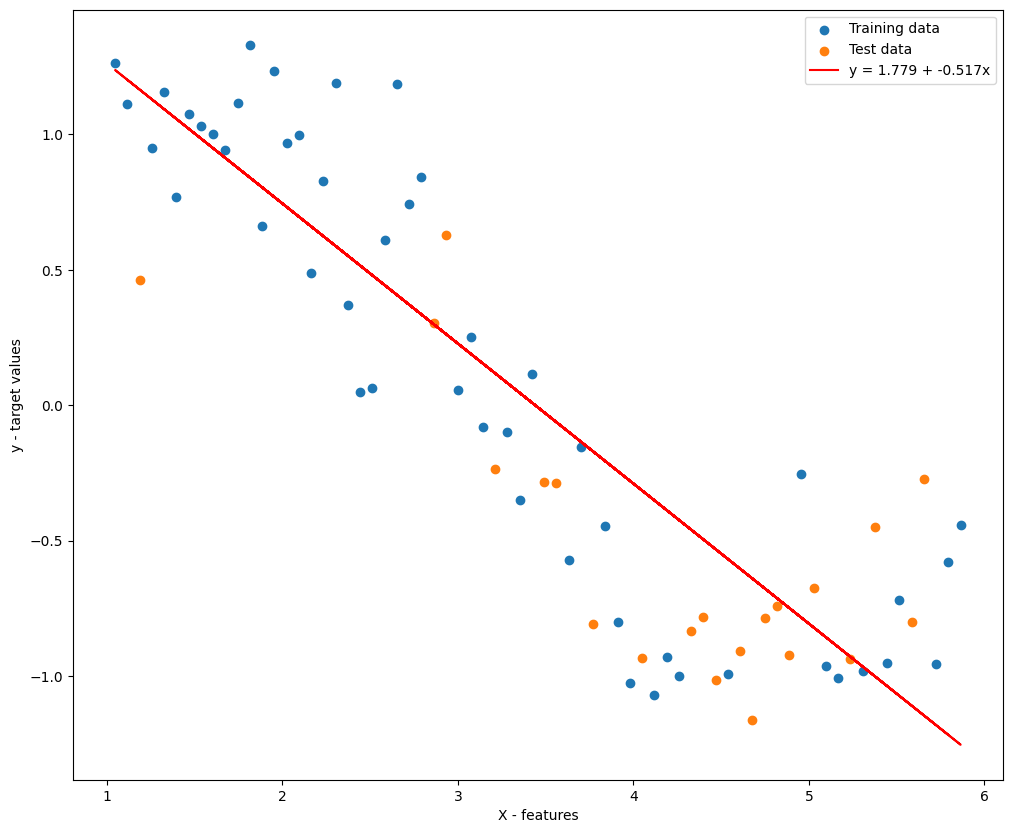

Score (Training):  0.788
Score (Test):      0.260


In [7]:
use_our_predict = True

plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')
plt.xlabel("X - features")
plt.ylabel("y - target values")

# Plotting the linear regression line
equation = "y = {:.3f} + {:.3f}x".format(model.intercept_, model.coef_[0])
plt.plot(X_train, model.predict(X_train), color='red', label=equation)

plt.legend()
plt.show()

print('Score (Training):  {:.3f}'.format(model.score(X_train, y_train)))
print('Score (Test):      {:.3f}'.format(model.score(X_test, y_test)))

The model is not fit for the data.

#Polynomial Regression

Polynomial regression is useful for data sets whose shape has ‘bends’, from simple parabolas, to swings and roundabouts, for which a straight line is simply not a predictive model at all.

Here, pf will be used to generate polynomial features up to the 10th degree, and it will not include a bias column (i.e., the column of ones) in the output features.

In [8]:
pf = PolynomialFeatures(degree=10, include_bias=False) # degrees = 10: we want x^2 up to x^10 power
X_features = pf.fit_transform(X_train)
X_features[0]

array([3.42084533e+00, 1.17021828e+01, 4.00313574e+01, 1.36941082e+02,
       4.68454262e+02, 1.60250958e+03, 5.48193741e+03, 1.87528600e+04,
       6.41506337e+04, 2.19449396e+05])

In [9]:
model = LinearRegression().fit(X_features, y_train)

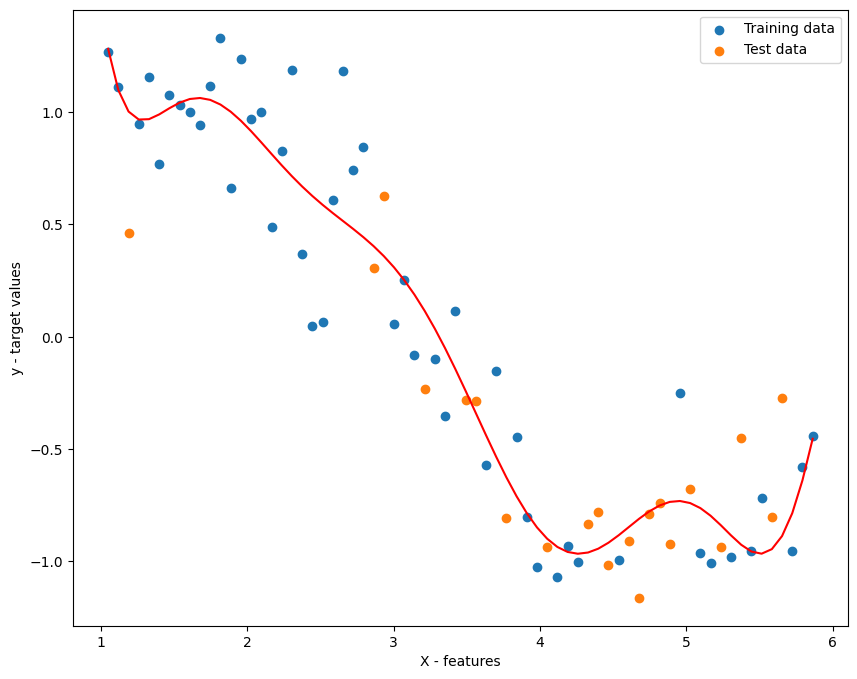

Score (Training):  0.905
Score (Test):      0.723


In [10]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100
plt.scatter(X_train,y_train,label='Training data')
plt.scatter(X_test,y_test,label='Test data')
plt.xlabel("X - features")
plt.ylabel("y - target values")
# Remember that model.predict() takes a sets of features!
plt.plot(X, model.predict(pf.fit_transform(X)), color='red')
plt.legend(loc='upper right')
plt.show()

print('Score (Training):  {:.3f}'.format(model.score(pf.fit_transform(X_train), y_train)))
print('Score (Test):      {:.3f}'.format(model.score(pf.fit_transform(X_test), y_test)))

Its highly overfit as we used a higher degree polynomial. We need to find the right value in degree to use.
Linear regression is very sensitive to outliers. We could do regularization or lower the degrees.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
degrees = [2, 3, 4, 5, 6, 20] # Change degree "hyperparameter" here
best_score = 0
best_degree = 0
for degree in degrees:
        poly_features = PolynomialFeatures(degree = degree)
        X_train_poly = poly_features.fit_transform(X_train)
        polynomial_regressor = LinearRegression()
        polynomial_regressor.fit(X_train_poly, y_train)
        scores = cross_val_score(polynomial_regressor, X_train_poly, y_train, cv=5) # Change k-fold cv value here
        if max(scores) > best_score:
            best_score = max(scores)
            best_degree = degree
print(best_score)
print(best_degree)

0.9333106801467072
5


As per results, degree of 5 gives us a higher test score.

#Let's See the effect of polynomial terms

For the purpose of our lab, we are creating  additional columns in the DataFrame data where each column is a polynomial value of the variable x (sine function), raised to a power ranging from 2 to 15.

In [12]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.265501  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.113378  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.463564  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.948541  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.156697  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

Now that we have all the 15 powers, let’s make 15 different linear regression models, with each model containing variables with powers of x from 1 to the particular model number. For example, the feature set of model 8 will be – {x, x_2, x_3, …, x_8}.

This will help us visualize the effect of coefficients in ridge and lasso regression

In [13]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])

    #Fit the model
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data[predictors])

    linreg = LinearRegression()
    linreg.fit(X_scaled,data['y'])
    y_pred = linreg.predict(X_scaled)

    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)

    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

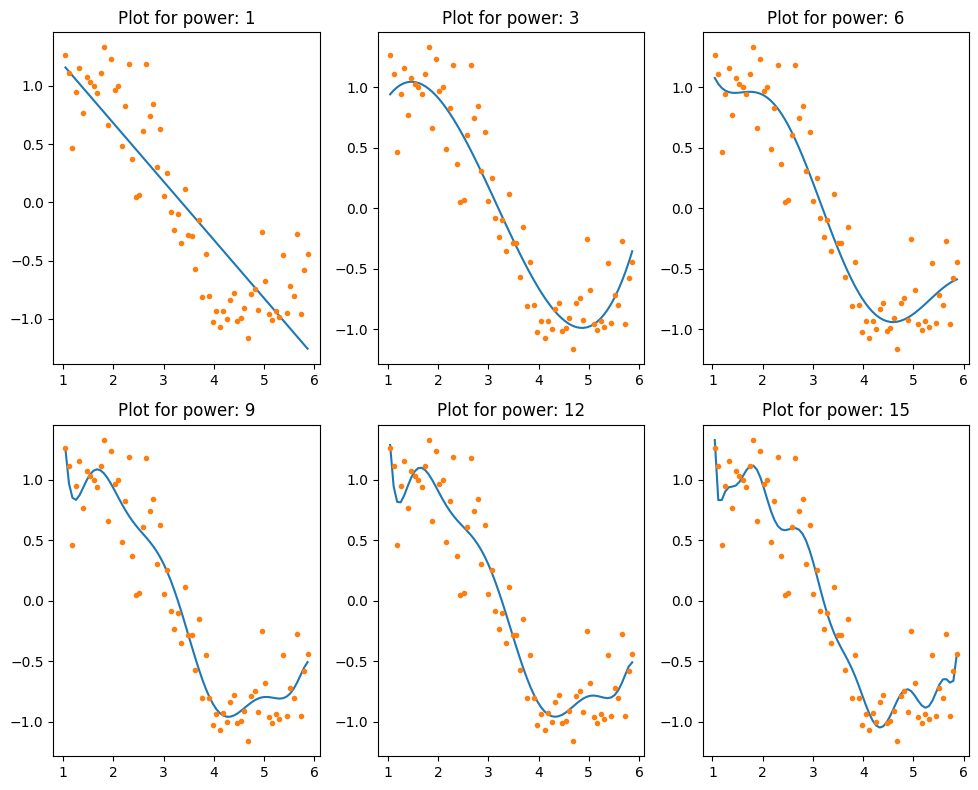

In [14]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

As the model complexity increases, the models tend to fit even smaller deviations in the training data set. Lets see the coefficients of each model below.

In [15]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,11,-0.048,-0.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,8.8,-0.048,-1.6,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,5.1,-0.048,3.2,-9.8,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,5,-0.048,5.7,-19,17,-4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,4.7,-0.048,-8.4,52,-1.2e+02,1.1e+02,-39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,4.6,-0.048,-19,1.2e+02,-3.1e+02,3.7e+02,-2.1e+02,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,4.6,-0.048,32,-2.8e+02,1.1e+03,-2.2e+03,2.5e+03,-1.5e+03,3.6e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,4.4,-0.048,-2.2e+02,2e+03,-8.6e+03,2.1e+04,-3.1e+04,2.8e+04,-1.4e+04,2.9e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,4.2,-0.048,-9.3e+02,9.6e+03,-4.7e+04,1.3e+05,-2.4e+05,2.8e+05,-2e+05,8.2e+04,-1.4e+04,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,4.2,-0.048,-1.3e+03,1.4e+04,-7.2e+04,2.2e+05,-4.4e+05,5.9e+05,-5.2e+05,2.9e+05,-9.1e+04,1.3e+04,NaN,NaN,NaN,NaN,NaN


It is clearly evident that the **size of coefficients increases exponentially with an increase in model complexity**. When coefficients become too large, the algorithm starts modeling intricate relations to estimate the output and ends up overfitting the particular training data. Thus, we need regularization techniques to reduce the effect of coefficients

#Ridge

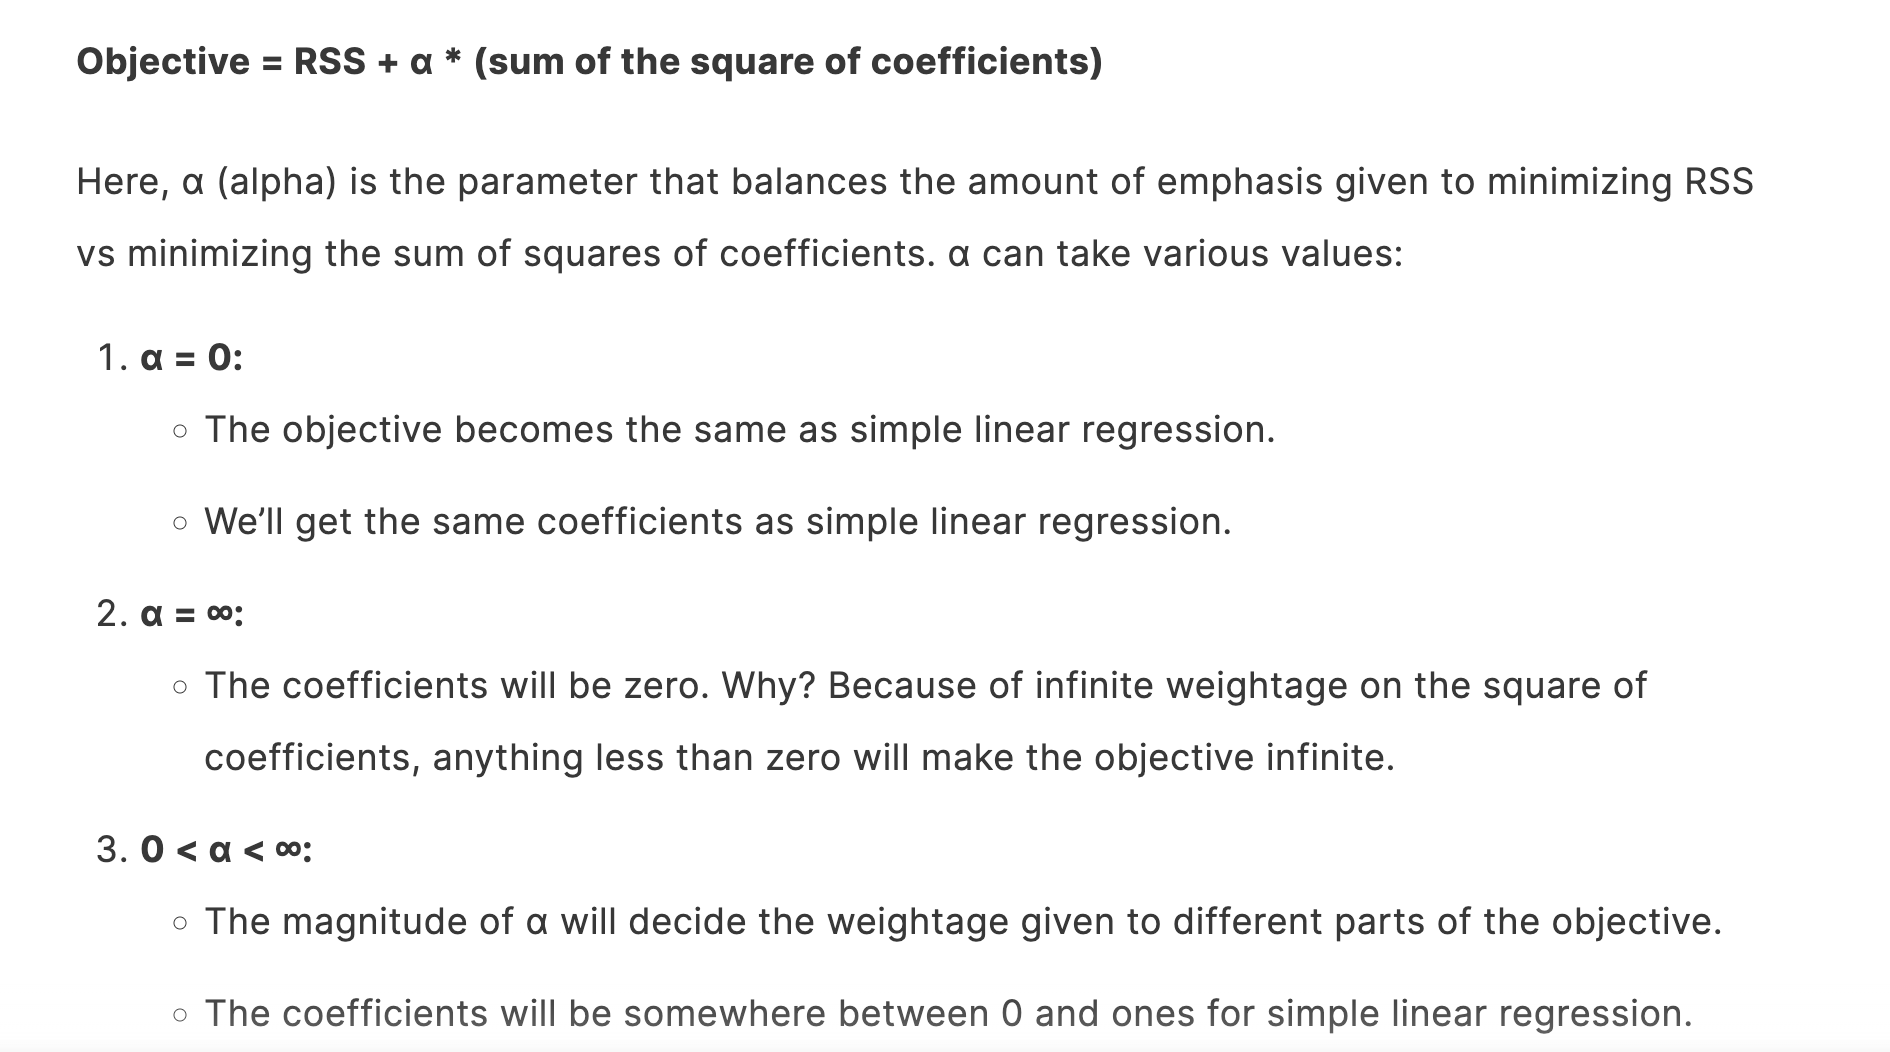

In [44]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
def ridge_regression(data, predictors, alpha):
    #Fit the model
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data[predictors])
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(X_scaled,data['y'])
    y_pred = ridgereg.predict(X_scaled)

    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret, y_pred

Lets see the effect of alpha.

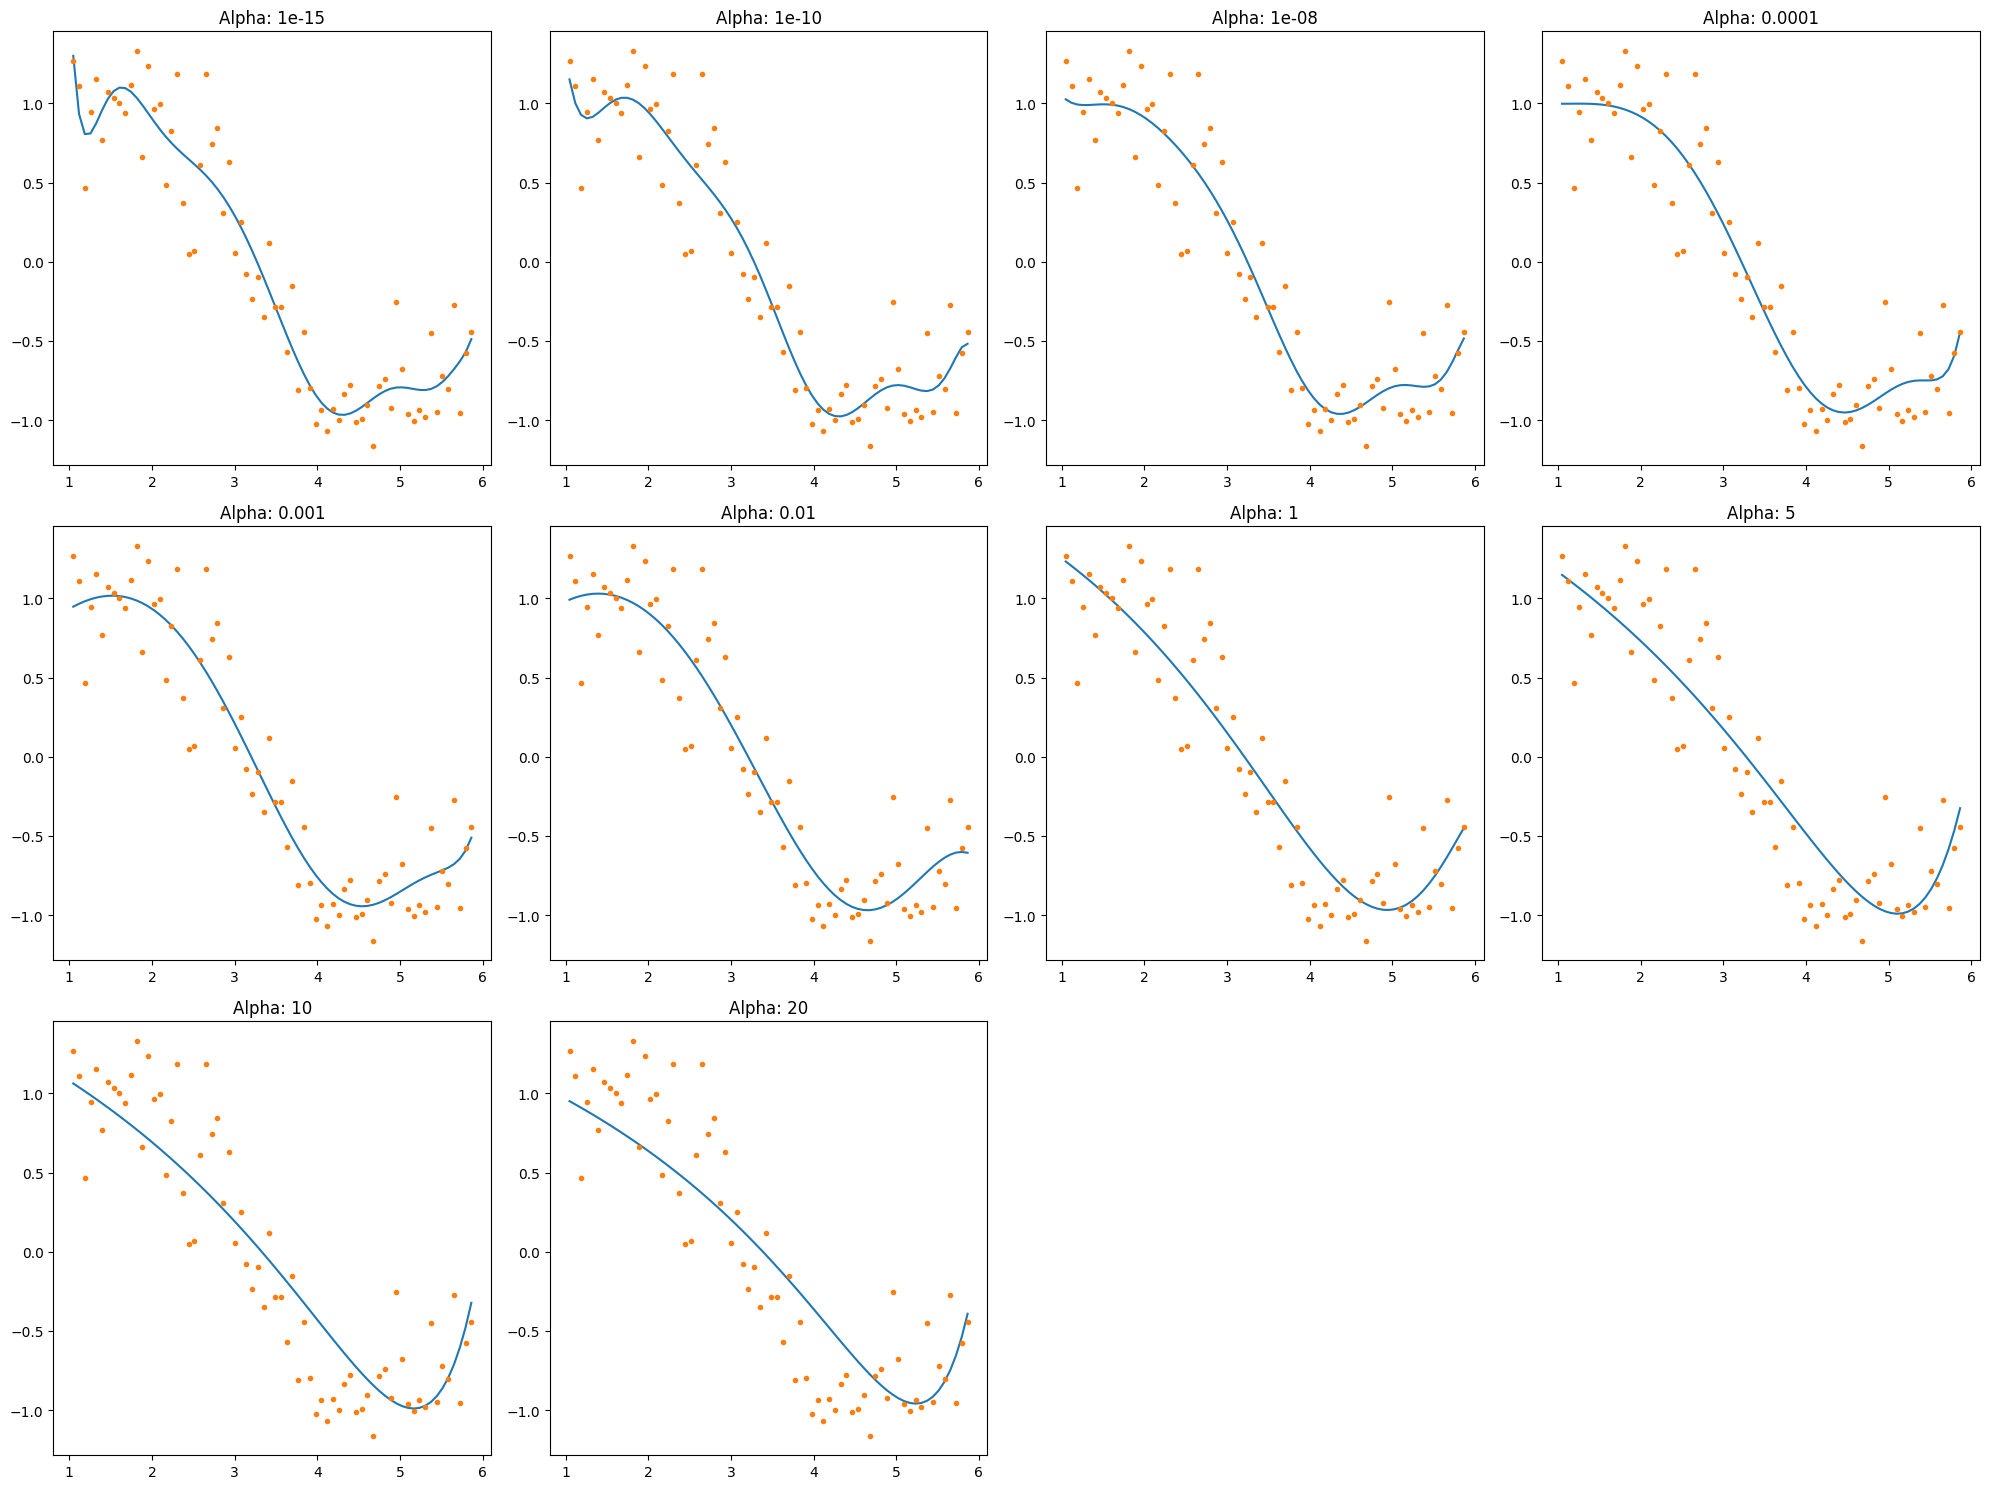

             rss intercept coef_x_1 coef_x_2 coef_x_3 coef_x_4 coef_x_5  \
alpha_1e-15  4.1    -0.048 -2.2e+03  2.4e+04 -1.2e+05  3.6e+05   -6e+05   
alpha_1e-10  4.3    -0.048 -2.2e+02  1.8e+03 -6.3e+03    1e+04 -5.2e+03   
alpha_1e-08  4.4    -0.048      -29  2.2e+02 -6.9e+02  8.7e+02      -16   
alpha_0.0001 4.5    -0.048    -0.68      3.8     -4.2     -5.6     -1.4   
alpha_0.001  4.6    -0.048     0.83    -0.55       -3     -2.1     0.43   
alpha_0.01   4.8    -0.048      1.1       -2     -1.8    -0.44     0.81   
alpha_1      5.8    -0.048    -0.39    -0.48    -0.35    -0.15    0.024   
alpha_5      6.6    -0.048    -0.43    -0.34    -0.21     -0.1   -0.014   
alpha_10     7.3    -0.048    -0.38    -0.29    -0.19     -0.1   -0.037   
alpha_20     8.4    -0.048    -0.32    -0.25    -0.17    -0.11   -0.053   

             coef_x_6 coef_x_7 coef_x_8 coef_x_9 coef_x_10 coef_x_11  \
alpha_1e-15   3.6e+05  4.4e+05 -8.5e+05 -1.4e+04     1e+06  -4.3e+05   
alpha_1e-10  -5.7e+03  4.2e+03

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Initialize predictors to be set of 15 powers of x
predictors = ['x']
predictors.extend([f'x_{i}' for i in range(2, 16)])

# Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

# Initialize the dataframe for storing coefficients.
col = ['rss', 'intercept'] + [f'coef_x_{i}' for i in range(1, 16)]
ind = [f'alpha_{alpha:.2g}' for alpha in alpha_ridge]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

# Create a new figure
plt.figure(figsize=(20, 15))

n_rows = 3
n_cols = 4

# Iterate through all alphas
for i, alpha in enumerate(alpha_ridge):
    # Create a subplot for each alpha
    plt.subplot(n_rows, n_cols, i+1)

    # Call ridge_regression and store the results
    results, y_pred = ridge_regression(data, predictors, alpha)
    coef_matrix_ridge.iloc[i] = results

    # Plot the results
    plt.plot(data['x'], y_pred)
    plt.plot(data['x'], data['y'], '.')
    plt.title(f'Alpha: {alpha:.3g}')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Display the coefficient matrix
print(coef_matrix_ridge)

Here we can clearly observe that as the value of alpha increases, the model complexity reduces. Though higher values of alpha reduce overfitting, significantly high values can cause underfitting as well (e.g., alpha = 5). Thus alpha should be chosen wisely. A widely accepted technique is cross-validation, i.e., the value of alpha is iterated over a range of values, and the one giving a higher cross-validation score is chosen.

In [46]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,4.1,-0.048,-2.2e+03,2.4e+04,-1.2e+05,3.6e+05,-6e+05,3.6e+05,4.4e+05,-8.5e+05,-1.4e+04,1e+06,-4.3e+05,-9.8e+05,1.4e+06,-6.8e+05,1.3e+05
alpha_1e-10,4.3,-0.048,-2.2e+02,1.8e+03,-6.3e+03,1e+04,-5.2e+03,-5.7e+03,4.2e+03,5.4e+03,-1.3e+03,-5.1e+03,-1.5e+03,3.9e+03,2.8e+03,-4.2e+03,1.2e+03
alpha_1e-08,4.4,-0.048,-29,2.2e+02,-6.9e+02,8.7e+02,-16,-7.2e+02,-1.8e+02,5.5e+02,5.4e+02,-75,-6e+02,-4.6e+02,2.6e+02,7.5e+02,-4.4e+02
alpha_0.0001,4.5,-0.048,-0.68,3.8,-4.2,-5.6,-1.4,3.5,6,5.2,2.1,-1.8,-4.8,-5.7,-4.1,0.23,6.9
alpha_0.001,4.6,-0.048,0.83,-0.55,-3,-2.1,0.43,2.5,3.2,2.4,0.71,-1.1,-2.5,-2.9,-2.1,0.081,3.7
alpha_0.01,4.8,-0.048,1.1,-2,-1.8,-0.44,0.81,1.4,1.3,0.86,0.19,-0.43,-0.84,-0.94,-0.68,-0.045,0.95
alpha_1,5.8,-0.048,-0.39,-0.48,-0.35,-0.15,0.024,0.14,0.21,0.22,0.2,0.16,0.099,0.033,-0.036,-0.11,-0.17
alpha_5,6.6,-0.048,-0.43,-0.34,-0.21,-0.1,-0.014,0.044,0.078,0.093,0.093,0.085,0.069,0.05,0.028,0.0055,-0.017
alpha_10,7.3,-0.048,-0.38,-0.29,-0.19,-0.1,-0.037,0.01,0.04,0.057,0.065,0.065,0.062,0.055,0.046,0.036,0.025
alpha_20,8.4,-0.048,-0.32,-0.25,-0.17,-0.11,-0.053,-0.015,0.012,0.03,0.042,0.049,0.052,0.053,0.052,0.05,0.047


1. The RSS increases with an increase in alpha.
2. An alpha value as small as 1e-15 gives us a significant reduction in the magnitude of coefficients. How? Compare the coefficients in the first row of this table to the last row of the simple linear regression table.
3. High alpha values can lead to significant underfitting. Note the rapid increase in RSS for values of alpha greater than 1.
4. Though the coefficients are really small, they are NOT zero.

In [48]:
zero_coef_count = coef_matrix_ridge.apply(lambda x: sum(x.values==0), axis=1)
print("\nNumber of zero coefficients for each alpha:")
print(zero_coef_count)


Number of zero coefficients for each alpha:
alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64


None of the coefficients are 0.

#Lasso

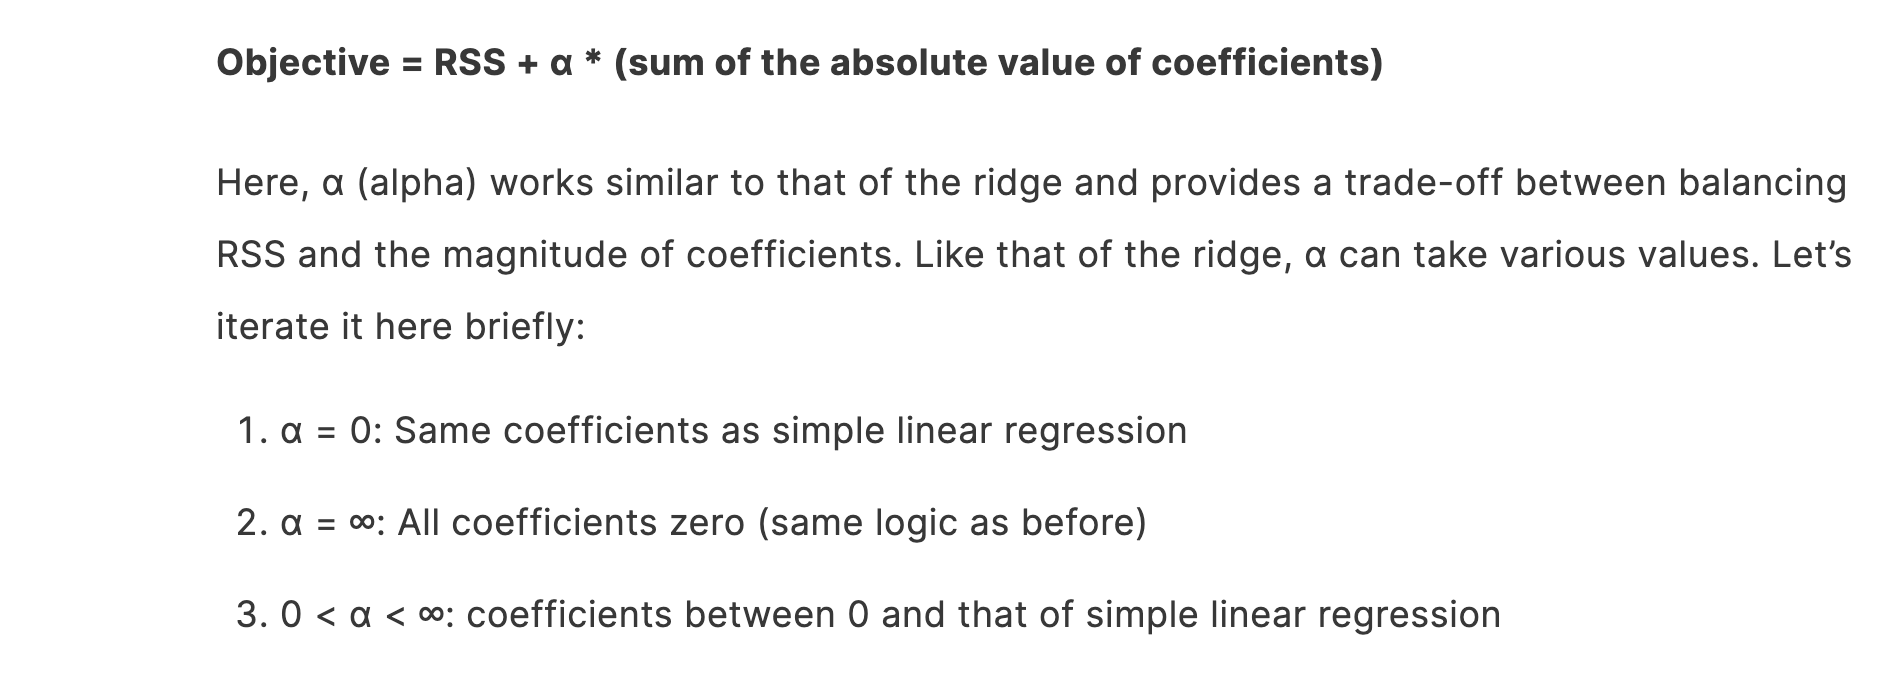

In [53]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings

def lasso_regression(data, predictors, alpha, max_iter=1000, tol=1e-4):
    # Fit the model
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data[predictors])

    with warnings.catch_warnings(record=True) as w:
        warnings.simplefilter("always")
        lassoreg = Lasso(alpha=alpha, max_iter=max_iter, tol=tol)
        lassoreg.fit(X_scaled, data['y'])
        y_pred = lassoreg.predict(X_scaled)

        if len(w) > 0 and issubclass(w[-1].category, ConvergenceWarning):
            print(f"Warning: Lasso did not converge for alpha={alpha}. Consider increasing max_iter or adjusting tol.")

    # Return the result in pre-defined format
    rss = np.sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret, y_pred

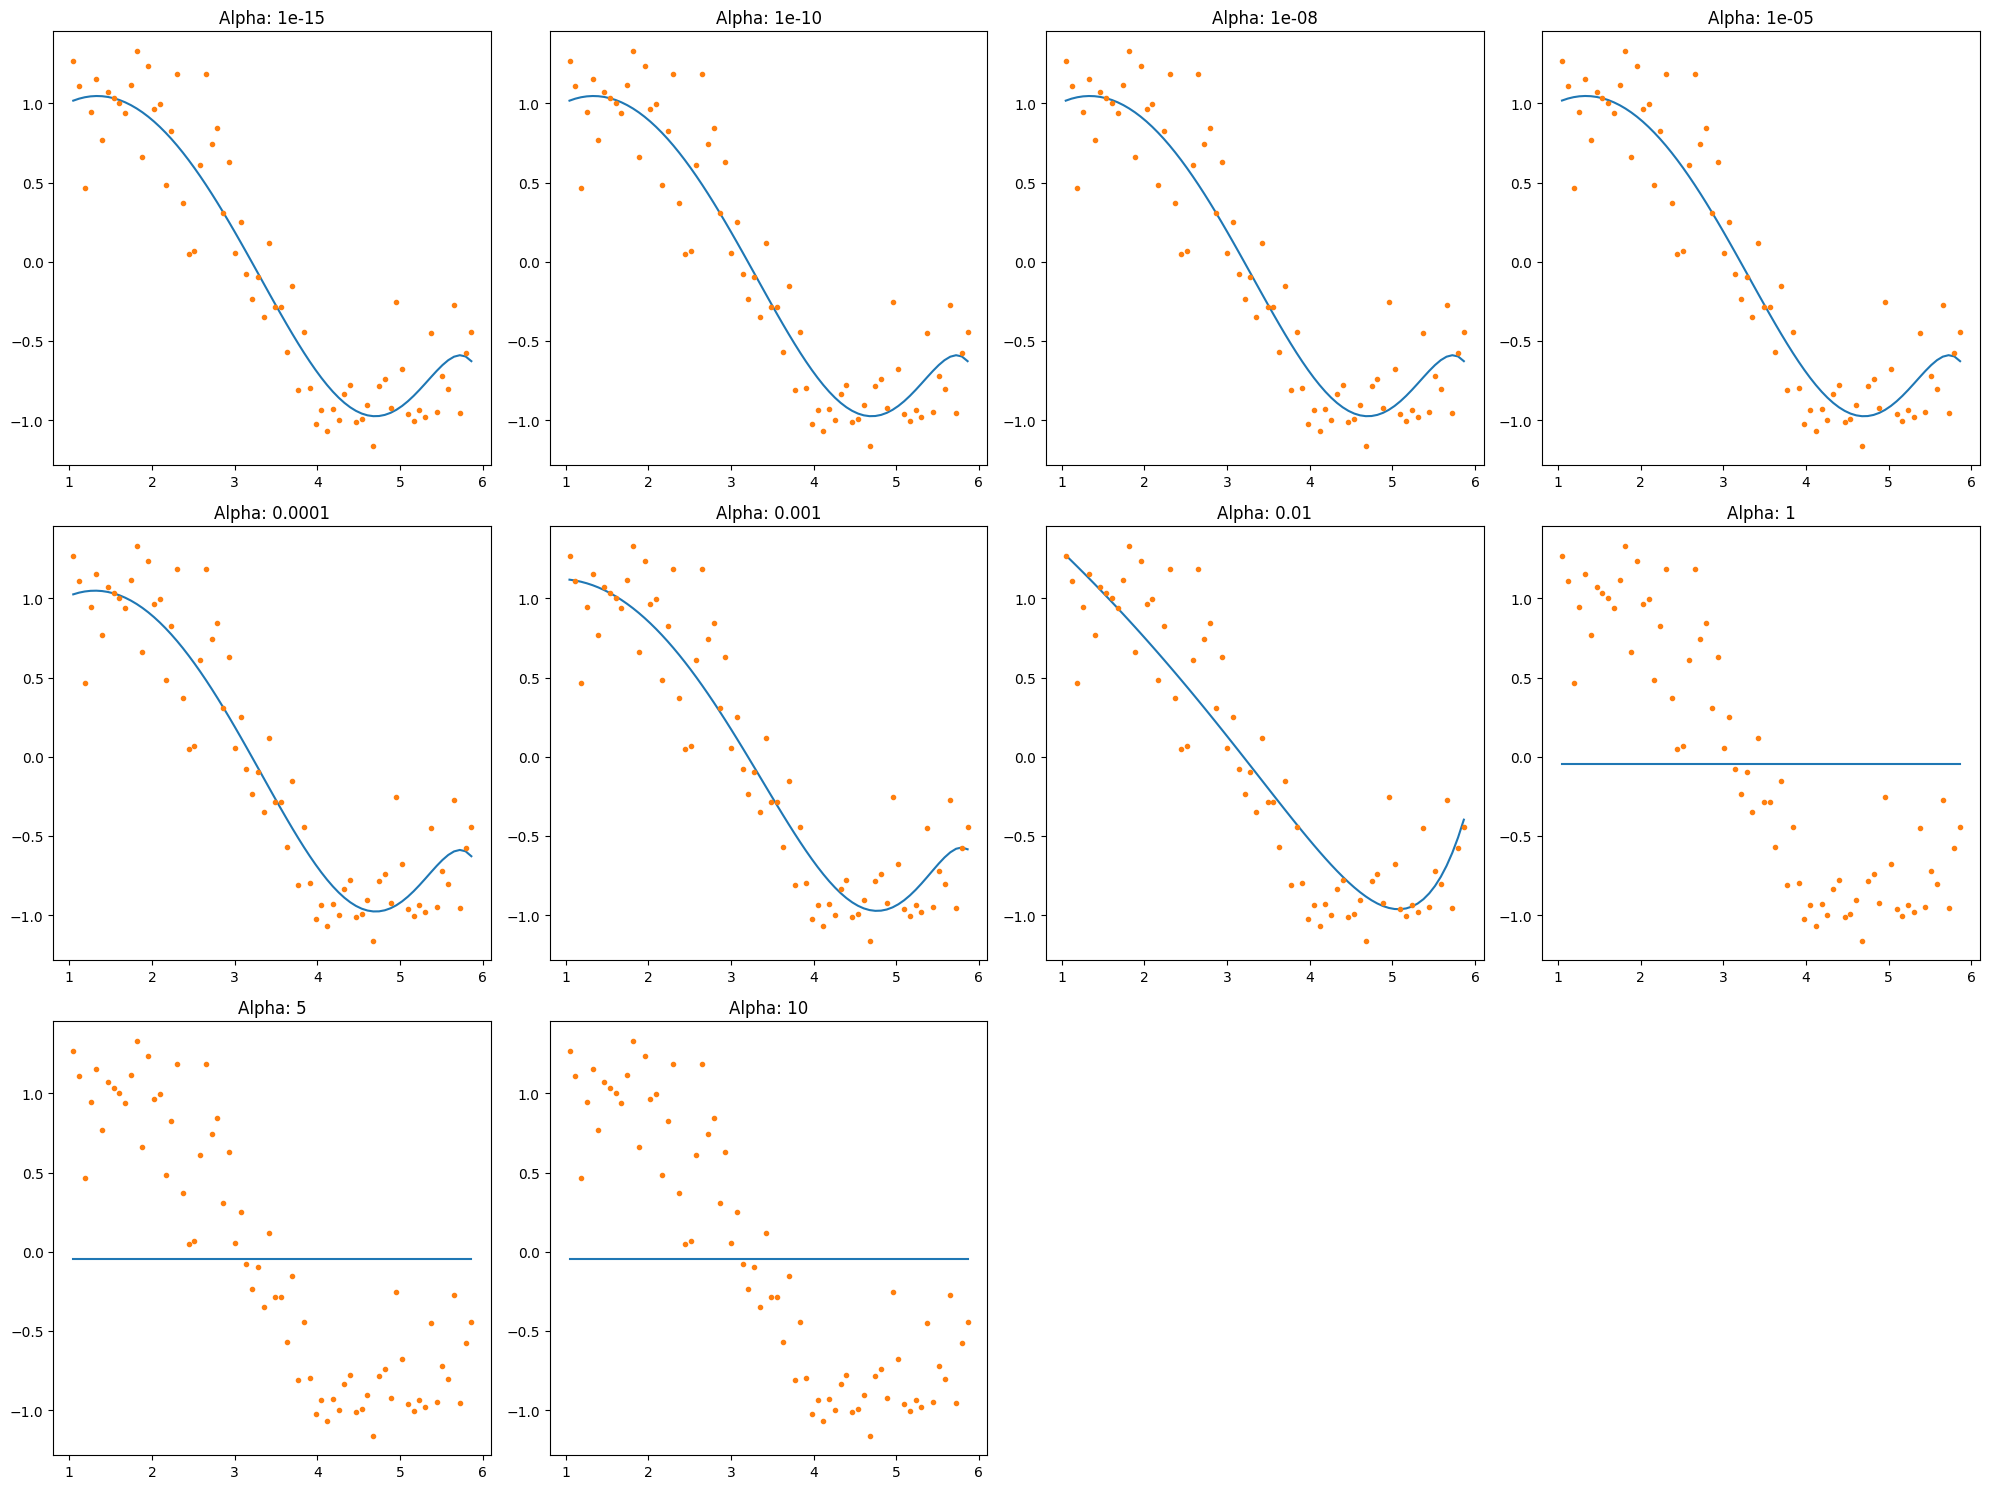

             rss intercept coef_x_1 coef_x_2 coef_x_3 coef_x_4 coef_x_5  \
alpha_1e-15  4.9    -0.048      1.3     -3.3     -0.7      0.5     0.81   
alpha_1e-10  4.9    -0.048      1.3     -3.3     -0.7      0.5     0.81   
alpha_1e-08  4.9    -0.048      1.3     -3.3     -0.7      0.5     0.81   
alpha_1e-05  4.9    -0.048      1.3     -3.3     -0.7     0.48     0.81   
alpha_0.0001 4.9    -0.048      1.2     -3.1    -0.67     0.33     0.82   
alpha_0.001  5.1    -0.048     0.54       -2    -0.45       -0    0.088   
alpha_0.01   6.4    -0.048    -0.59    -0.41       -0       -0        0   
alpha_1       46    -0.048       -0       -0       -0       -0       -0   
alpha_5       46    -0.048       -0       -0       -0       -0       -0   
alpha_10      46    -0.048       -0       -0       -0       -0       -0   

             coef_x_6 coef_x_7 coef_x_8 coef_x_9 coef_x_10 coef_x_11  \
alpha_1e-15       0.7     0.46     0.23    0.058    -0.059     -0.12   
alpha_1e-10       0.7     0.46

In [54]:
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
import numpy as np
import pandas as pd

# Initialize predictors to all 15 powers of x
predictors = ['x']
predictors.extend([f'x_{i}' for i in range(2, 16)])

# Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10]

# Initialize the dataframe to store coefficients
col = ['rss', 'intercept'] + [f'coef_x_{i}' for i in range(1, 16)]
ind = [f'alpha_{alpha:.2g}' for alpha in alpha_lasso]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

# Create a new figure
plt.figure(figsize=(20, 15))

n_rows = 3
n_cols = 4

# Iterate over the 10 alpha values:
for i, alpha in enumerate(alpha_lasso):
    # Create a subplot for each alpha
    plt.subplot(n_rows, n_cols, i+1)

    # Call lasso_regression and store the results
    results, y_pred = lasso_regression(data, predictors, alpha, max_iter=1000, tol=1e-6)
    coef_matrix_lasso.iloc[i] = results

    # Plot the results
    plt.plot(data['x'], y_pred)
    plt.plot(data['x'], data['y'], '.')
    plt.title(f'Alpha: {alpha:.3g}')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Display the coefficient matrix
print(coef_matrix_lasso)

This again tells us that the model complexity decreases with an increase in the values of alpha. But notice the straight line at alpha=1.

In [55]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,4.9,-0.048,1.3,-3.3,-0.7,0.5,0.81,0.7,0.46,0.23,0.058,-0.059,-0.12,-0.15,-0.14,-0.12,-0.083
alpha_1e-10,4.9,-0.048,1.3,-3.3,-0.7,0.5,0.81,0.7,0.46,0.23,0.058,-0.059,-0.12,-0.15,-0.14,-0.12,-0.083
alpha_1e-08,4.9,-0.048,1.3,-3.3,-0.7,0.5,0.81,0.7,0.46,0.23,0.058,-0.059,-0.12,-0.15,-0.14,-0.12,-0.083
alpha_1e-05,4.9,-0.048,1.3,-3.3,-0.7,0.48,0.81,0.7,0.46,0.23,0.056,-0.051,-0.12,-0.15,-0.14,-0.12,-0.084
alpha_0.0001,4.9,-0.048,1.2,-3.1,-0.67,0.33,0.82,0.7,0.46,0.22,0.039,-0,-0.046,-0.16,-0.16,-0.14,-0.1
alpha_0.001,5.1,-0.048,0.54,-2,-0.45,-0,0.088,0.9,0.52,0.18,0,0,0,-0,-0,-0.025,-0.35
alpha_0.01,6.4,-0.048,-0.59,-0.41,-0,-0,0,0,0,0.041,0.37,0,0,0,0,0,0
alpha_1,46,-0.048,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,46,-0.048,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,46,-0.048,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


We can observe that even for a small value of alpha, a significant number of coefficients are zero. Many of the coefficients are zero, even for very small values of alpha.

In [56]:
# Count the number of zero coefficients for each alpha value
zero_coef_count = coef_matrix_lasso.apply(lambda x: sum(x.values==0), axis=1)
print("\nNumber of zero coefficients for each alpha:")
print(zero_coef_count)


Number of zero coefficients for each alpha:
alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      0
alpha_0.0001     1
alpha_0.001      6
alpha_0.01      11
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64


**Lets Look at the regression using a dataset**

## Linear Regression

For this implementation, we will use a College Admission Dataset. What we intend to see is:

How to perform linear regression using python / sklearn and extend it with ridge and lasso regularization techniques

### Load Packages

The first step is to import the required libraries for the code to run. These libraries include pandas, numpy, seaborn, matplotlib.pyplot, scikit-learn's train_test_split, LinearRegression, Ridge, RidgeCV, Lasso, and StandardScaler from scikit-learn datasets. To import these libraries, use the import keyword followed by the library name.

In [67]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler

In [68]:
# Load csv file as df
df = pd.read_csv("Admission.csv")
#Display df
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.7,1,0.92
1,2,324,107,4,4,4.5,8.9,1,0.76
2,3,316,104,3,3,3.5,8,1,0.72
3,4,322,110,3,3.5,2.5,8.7,1,0.8
4,5,314,103,2,2,3,8.2,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4,9,1,0.87
496,497,337,117,5,5,5,9.9,1,0.96
497,498,330,120,5,4.5,5,9.6,1,0.93
498,499,312,103,4,4,5,8.4,0,0.73


In [69]:
df.drop('Serial No.',axis=1,inplace=True)

The dataset might need some cleaning or preprocessing before it can be used for analysis. Here, we will not be doing any data preprocessing as the dataset is already clean and ready to use.

### Split the dataset

Seperate the last column since this is the target variable

In [70]:
X, y = df.iloc[:,:-1],df.iloc[:,7]

In [71]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.8
4,0.65


Split the dataset into training and testing datasets using scikit-learn's train_test_split function. This is done to train the model on the training dataset and test its accuracy on the testing dataset. The function takes the dataset, the target variable, and the test_size as input parameters.

In [72]:
# bins = np.linspace(0, 1, 5)
# y_binned = np.digitize(y, bins)

# Split the dataset
# Random state changes results... aka bias in split .... stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# Print the shape of the training and testing data
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

#Call the Scaler function
scaler = StandardScaler()

# Scale the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (350, 7)
The dimension of X_test is (150, 7)


## Linear and Ridge Regression Models
We will build a linear and a ridge regression model and then compare the coefficients in a plot. The code creates a linear regression model object using scikit-learn's LinearRegression class, fits the model on the training data, and evaluates the model's performance by calculating the R-squared scores on both the training and test data. Finally, the code prints the calculated scores for both the training and test data using the print function. The score of the train and test sets will also help us evaluate how well the model performs.

In [73]:
# Instantiate the model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Predict values on X_test
prediction = lr.predict(X_test)

# Store true labels in an object
actual = y_test

# Compute scores for training and test data
train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

# Print the scores
print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

The train score for lr model is 0.8136087548060703
The test score for lr model is 0.8330100490780515


## Ridge Regression

The first step is to create a Ridge regression model object using the Ridge class from the scikit-learn library. An alpha value of 10 is specified for regularization, which controls the strength of regularization. The Ridge regression model is then fit using the fit method on the training data, X_train and y_train. The model is evaluated by calculating the R-squared scores on both the training and test data, using the score method on the Ridge regression model object. The resulting scores are assigned to 'train_score_ridge' and 'test_score_ridge', respectively. Finally, the calculated R-squared scores for both the training and test data are printed using the print function. The Ridge regression model is particularly useful in addressing multicollinearity in the dataset.

In [74]:
#Ridge Regression Model
# Instantiate the model and set penalization factor for coefficient magnitudes
ridgeReg = Ridge(alpha=10)

# Fit the model
ridgeReg.fit(X_train,y_train)

# Compute train and test score for ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

# Print the scores
print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.8129946034141572
The test score for ridge model is 0.8360138189342871


Using an alpha value of 10, the evaluation of the model, the train, and test data indicate better performance on the ridge model than on the linear regression model.

We can also plot the coefficients for both the linear and ridge models.

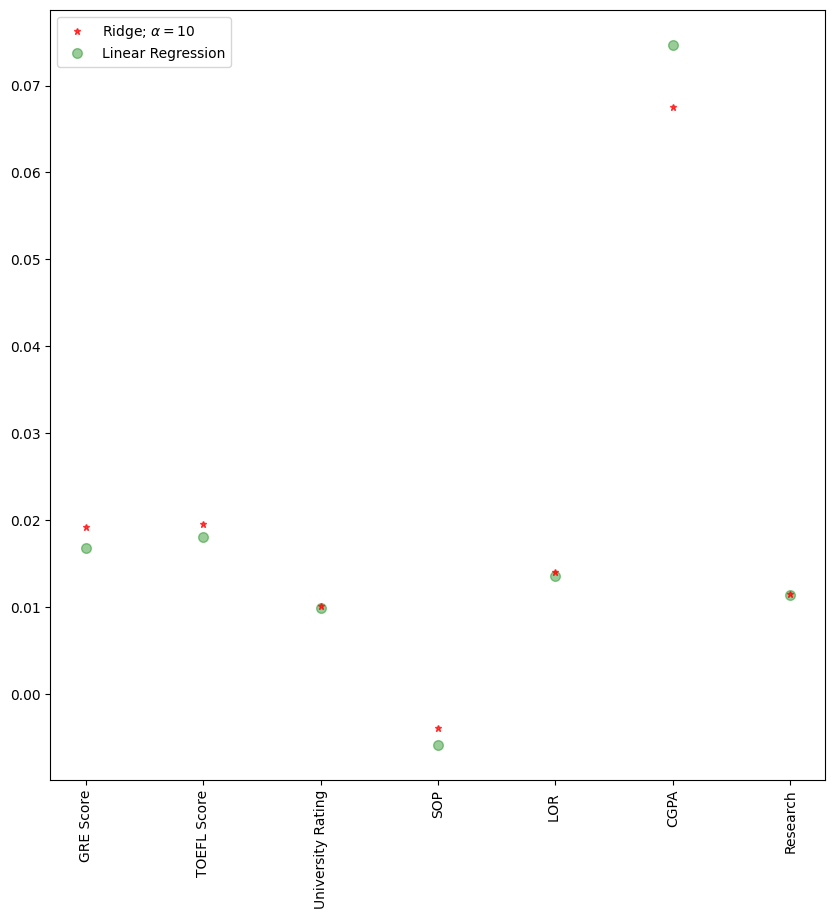

In [75]:
# Plot the coefficients for both models
plt.figure(figsize = (10, 10))
plt.plot(X.columns,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

##  Lasso Regression

The provided code also includes instructions for implementing a Lasso regression model to the same dataset. The first step is to create a Lasso regression model object using the Lasso class from the scikit-learn library. An alpha value of 10 is specified for regularization, which controls the strength of regularization. The Lasso regression model is then fit using the fit method on the training data, X_train and y_train. The model is evaluated by calculating the R-squared scores on both the training and test data, using the score method on the Lasso regression model object. The resulting scores are assigned to 'train_score_ls' and 'test_score_ls', respectively. Finally, the calculated R-squared scores for both the training and test data are printed using the print function. Lasso regression is a useful technique for feature selection as it automatically performs variable selection and reduces the coefficients of less important features to zero.

In [76]:
## Lasso regression model
print("\nLasso Model............................................\n")
# Instantiate the model
lasso = Lasso(alpha=10)

# Fit the model
lasso.fit(X_train,y_train)

# Compute train and test score for lasso regression
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

# Print the scores
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.000266830598238732


We can visualize the coefficients too.

<Axes: >

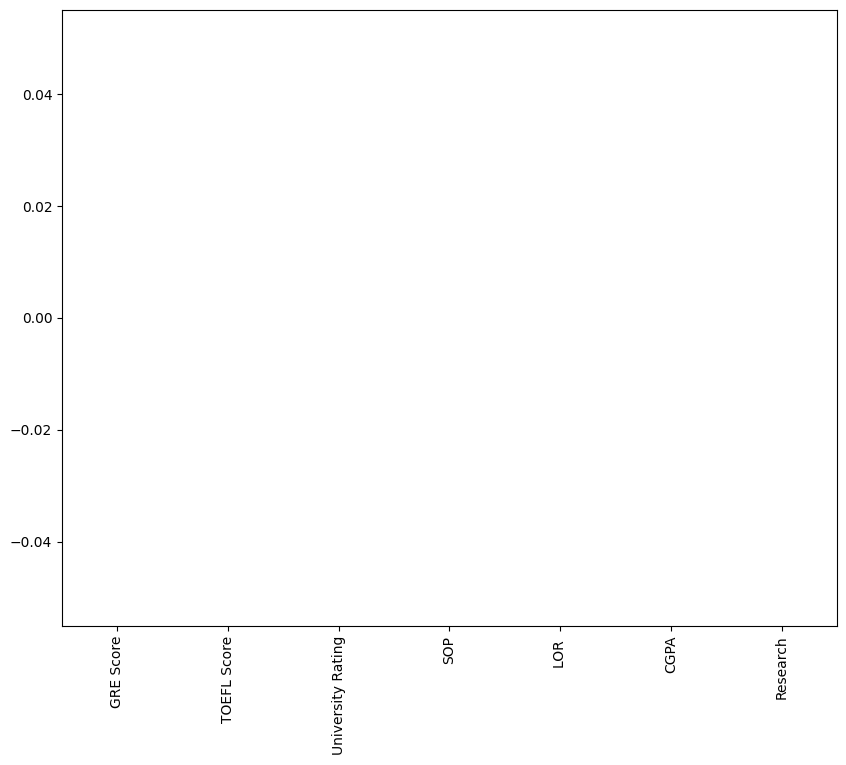

In [77]:
# Plot the coefficients of the Lasso regression
pd.Series(lasso.coef_, X.columns).sort_values(ascending = True).plot(kind = "bar")

Earlier on, we established that the lasso model can inert to zero due to the diamond shape of the constraint region. In this case, using an alpha value of 10 over penalizes the model and shrinks all the values to zero. We can see this effectively by visualizing the coefficients of the model as shown in the figure above.

## Selecting Optimal Alpha Values Using Cross-Validation in Sklearn

We may need to try out different alpha values to find the optimal constraint value. For this case, we can use the cross-validation model in the sklearn package. This will try out different combinations of alpha values and then choose the best model.

In [78]:
# Using the linear CV model
from sklearn.linear_model import LassoCV

# Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


train_score_lscv = lasso_cv.score(X_train, y_train)
test_score_lscv = lasso_cv.score(X_test, y_test)

# Print scores
print('Selected alpha is: {}'.format(lasso_cv.alpha_))

print("The train score for ls model is {}".format(train_score_lscv))
print("The test score for ls model is {}".format(test_score_lscv))

Selected alpha is: 0.001
The train score for ls model is 0.8130055007346269
The test score for ls model is 0.8362380544938277


The model will be trained on different alpha values that I have specified in the LassoCV function. We can observe a better performance of the model, removing the tedious effort of manually changing alpha values.

We can compare the coefficients from the lasso model with the rest of the models (linear and ridge).

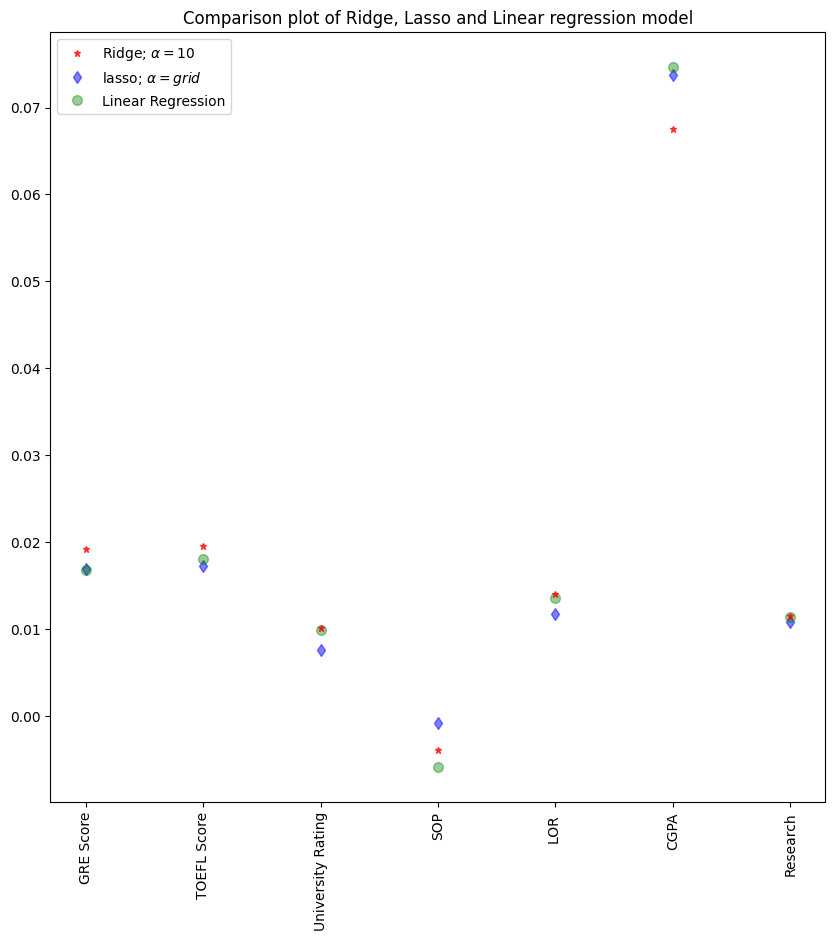

In [79]:
# Plot size
plt.figure(figsize = (10, 10))

# Add plot for ridge regression
plt.plot(X.columns,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

# Add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

# Add plot for linear model
plt.plot(X.columns,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

# Rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()

Note: A similar approach could be employed for the ridge regression model, which could lead to better results. In the sklearn package, the function RidgeCV performs similarly.

## Conclusion
We have seen an implementation of ridge and lasso regression models and the theoretical and mathematical concepts behind these techniques. Some of the key takeaways from this tutorial include:

1. The cost function for both ridge and lasso regression are similar. However, ridge regression takes the square of the coefficients and lasso takes the magnitude.
2. Lasso regression can be used for automatic feature selection, as the geometry of its constrained region allows coefficient values to inert to zero.
3. An alpha value of zero in either ridge or lasso model will have results similar to the regression model.
4. The larger the alpha value, the more aggressive the penalization.